#📌 Extracción

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

In [232]:
import pandas as pd
base = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")
base.head()
#como la base está anidada desanidamos
base

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


aqui desanidamos todo para tener una base de datos mela

In [233]:
customer = base['customer'].apply(lambda x: pd.Series(x))
phone = base['phone'].apply(lambda x: pd.Series(x))
internet = base['internet'].apply(lambda x: pd.Series(x))
account = base['account'].apply(lambda x: pd.Series(x))


charges = account['Charges'].apply(lambda x: pd.Series(x))

base = pd.concat([base.drop(columns=['customer', 'phone', 'internet', 'account']), customer, phone, internet, account.drop(columns=['Charges']), charges], axis=1)

In [234]:
pd.set_option('display.max_columns', None)

In [235]:
base.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


LOS DATOS VENIAN ANIDADOS, CON UN DICCIONARIO. TOCÓ DESANIDARLOS, BORRAR LAS COLUMNAS ORIGINALES Y ASIGNAR LAS LLAVES O INDICES DE LOS DICCIONARIOS DONDE ESTABAN LAS COLUMNAS ORIGINALES

#🔧 Transformación

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [236]:
"""
aqui vamos a ver los distintos tipos de datos que tiene la base
resultado? ver los tipos de datos
proceso: tomar la base con el dtype
"""

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Diccionario de datos proporcionado para la realización del desafío:

1. customerID: número de identificación único de cada cliente

2. Churn: si el cliente dejó o no la empresa

3. gender: género (masculino y femenino)

4. SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

5. Partner: si el cliente tiene o no una pareja

6. Dependents: si el cliente tiene o no dependientes

7. tenure: meses de contrato del cliente

8. PhoneService: suscripción al servicio telefónico

9. MultipleLines: suscripción a más de una línea telefónica

10. InternetService: suscripción a un proveedor de internet

11. OnlineSecurity: suscripción adicional de seguridad en línea

12. OnlineBackup: suscripción adicional de respaldo en línea

13. DeviceProtection: suscripción adicional de protección del dispositivo

14. TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

15. StreamingTV: suscripción de televisión por cable

16. StreamingMovies: suscripción de streaming de películas

17. Contract: tipo de contrato

18. PaperlessBilling: si el cliente prefiere recibir la factura en línea

19. PaymentMethod: forma de pago

20. Charges.Monthly: total de todos los servicios del cliente por mes

21. Charges.Total: total gastado por el cliente


##Relevantes para determinar que variables determinan el abandono

In [237]:
"""
tenure: meses de contrato del cliente (no)

PhoneService: suscripción al servicio telefónico (no)

InternetService: suscripción a un proveedor de internet (no)

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera (no)

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

SON LAS VARIABLES QUE SE QUEDAN PARA DETERMINAR SI UNA PERSONA ABANDONA O NO


"""

'\ntenure: meses de contrato del cliente (no)\n\nPhoneService: suscripción al servicio telefónico (no)\n\nInternetService: suscripción a un proveedor de internet (no)\n\nTechSupport: suscripción adicional de soporte técnico, menor tiempo de espera (no)\n\nStreamingTV: suscripción de televisión por cable\n\nStreamingMovies: suscripción de streaming de películas\n\nContract: tipo de contrato\n\nPaymentMethod: forma de pago\n\nCharges.Monthly: total de todos los servicios del cliente por mes\n\nSON LAS VARIABLES QUE SE QUEDAN PARA DETERMINAR SI UNA PERSONA ABANDONA O NO\n\n\n'

##cramos una mini base donde tenemos unicamente las variables de interés

In [238]:
df = base[[ 'Churn','tenure','PhoneService','InternetService','TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Monthly']]

In [239]:
df

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly
0,No,9,Yes,DSL,Yes,Yes,No,One year,Mailed check,65.60
1,No,9,Yes,DSL,No,No,Yes,Month-to-month,Mailed check,59.90
2,Yes,4,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,73.90
3,Yes,13,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,98.00
4,Yes,3,Yes,Fiber optic,Yes,Yes,No,Month-to-month,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...
7262,No,13,Yes,DSL,Yes,No,No,One year,Mailed check,55.15
7263,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,85.10
7264,No,2,Yes,DSL,No,No,No,Month-to-month,Mailed check,50.30
7265,No,67,Yes,DSL,Yes,No,Yes,Two year,Mailed check,67.85


In [240]:
for i in df.columns:
    print(df[i].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64
StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64
StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64
PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic

##Comprobación de incoherencias en los datos
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis.

Presta atención a valores ausentes
duplicados
errores de formato e inconsistencias en las categorías.

Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

verificamos si hay valores nulos

In [241]:
for i in df.columns:
    print(f"Column '{i}': {df[i].isnull().sum()} null values")
    #para cada columna escriba el nombre y la cantidad de valores null que tiene

Column 'Churn': 0 null values
Column 'tenure': 0 null values
Column 'PhoneService': 0 null values
Column 'InternetService': 0 null values
Column 'TechSupport': 0 null values
Column 'StreamingTV': 0 null values
Column 'StreamingMovies': 0 null values
Column 'Contract': 0 null values
Column 'PaymentMethod': 0 null values
Column 'Monthly': 0 null values


In [242]:
for i in df.columns:
  x= df[i].value_counts()
  x = pd.DataFrame(x)
  print(x)
  #como se ve el churn tiene valores que no son Yes o No entonces lo más práctico es llenarlo con la moda ya que es una variable categorica

       count
Churn       
No      5174
Yes     1869
         224
        count
tenure       
1         634
72        369
2         246
3         207
4         185
...       ...
28         60
39         59
44         54
36         50
0          11

[73 rows x 1 columns]
              count
PhoneService       
Yes            6560
No              707
                 count
InternetService       
Fiber optic       3198
DSL               2488
No                1581
                     count
TechSupport               
No                    3582
Yes                   2104
No internet service   1581
                     count
StreamingTV               
No                    2896
Yes                   2790
No internet service   1581
                     count
StreamingMovies           
No                    2870
Yes                   2816
No internet service   1581
                count
Contract             
Month-to-month   4005
Two year         1743
One year         1519
                    

In [243]:
df['Churn'] = df['Churn'].replace('','No')

/tmp/ipython-input-243-1524692130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].replace('','No')


In [244]:
df['Churn'].value_counts()

,count
Churn,
No,5398
Yes,1869


###Aquí nos damos cuenta de que el churn tiene NA

In [245]:
for i in df.columns:
  df = df.dropna(subset=[i])
df

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly
0,No,9,Yes,DSL,Yes,Yes,No,One year,Mailed check,65.60
1,No,9,Yes,DSL,No,No,Yes,Month-to-month,Mailed check,59.90
2,Yes,4,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,73.90
3,Yes,13,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,98.00
4,Yes,3,Yes,Fiber optic,Yes,Yes,No,Month-to-month,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...
7262,No,13,Yes,DSL,Yes,No,No,One year,Mailed check,55.15
7263,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,85.10
7264,No,2,Yes,DSL,No,No,No,Month-to-month,Mailed check,50.30
7265,No,67,Yes,DSL,Yes,No,Yes,Two year,Mailed check,67.85


##Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.


📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [246]:
df['Cuentas diarias'] = df['Monthly']/30

In [247]:
df.head()

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly,Cuentas diarias
0,No,9,Yes,DSL,Yes,Yes,No,One year,Mailed check,65.6,2.186667
1,No,9,Yes,DSL,No,No,Yes,Month-to-month,Mailed check,59.9,1.996667
2,Yes,4,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,73.9,2.463333
3,Yes,13,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,98.0,3.266667
4,Yes,3,Yes,Fiber optic,Yes,Yes,No,Month-to-month,Mailed check,83.9,2.796667


In [248]:
df.columns

Index(['Churn', 'tenure', 'PhoneService', 'InternetService', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'Monthly', 'Cuentas diarias'],
      dtype='object')

###Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

In [249]:
df[['Churn','PhoneService', 'InternetService', 'TechSupport','StreamingTV', 'StreamingMovies']]=df[['Churn','PhoneService', 'InternetService', 'TechSupport','StreamingTV', 'StreamingMovies']].apply(lambda x: x.replace('Yes','1').replace('No','0').replace('No internet service','0'))

se puede leer como: hagale cambios a estas variables y reemplace yes por un 1 y no por un 0

In [250]:
df.head()

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly,Cuentas diarias
0,0,9,1,DSL,1,1,0,One year,Mailed check,65.6,2.186667
1,0,9,1,DSL,0,0,1,Month-to-month,Mailed check,59.9,1.996667
2,1,4,1,Fiber optic,0,0,0,Month-to-month,Electronic check,73.9,2.463333
3,1,13,1,Fiber optic,0,1,1,Month-to-month,Electronic check,98.0,3.266667
4,1,3,1,Fiber optic,1,1,0,Month-to-month,Mailed check,83.9,2.796667


In [251]:
df.rename(columns={
    'Permanencia': 'tenure',
    'Servicio_telefónico': 'PhoneService',
    'Servicio_de_Internet': 'InternetService',
    'Soporte_técnico': 'TechSupport',
    'Streaming_de_TV': 'StreamingTV',
    'Streaming_de_películas': 'StreamingMovies',
    'Contrato': 'Contract',
    'Método_de_pago': 'PaymentMethod',
    'Mensual': 'Monthly',
    'Cuantas_diarias': 'Cuentas diarias'
}, inplace=True)


In [252]:
df

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly,Cuentas diarias
0,0,9,1,DSL,1,1,0,One year,Mailed check,65.60,2.186667
1,0,9,1,DSL,0,0,1,Month-to-month,Mailed check,59.90,1.996667
2,1,4,1,Fiber optic,0,0,0,Month-to-month,Electronic check,73.90,2.463333
3,1,13,1,Fiber optic,0,1,1,Month-to-month,Electronic check,98.00,3.266667
4,1,3,1,Fiber optic,1,1,0,Month-to-month,Mailed check,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,1,DSL,1,0,0,One year,Mailed check,55.15,1.838333
7263,1,22,1,Fiber optic,0,0,1,Month-to-month,Electronic check,85.10,2.836667
7264,0,2,1,DSL,0,0,0,Month-to-month,Mailed check,50.30,1.676667
7265,0,67,1,DSL,1,0,1,Two year,Mailed check,67.85,2.261667


#📊 Carga y análisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como:
1. media
2. mediana
3. desviación estándar

Y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [253]:
#sacamos informacion importante
df.describe(include = 'all')
#aqui se sacan todas las metricas estadisticas importantes

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly,Cuentas diarias
count,7267,7267.000000,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000
unique,2,NaN,2,3,2,2,2,3,4,NaN,NaN
top,0,NaN,1,Fiber optic,0,0,0,Month-to-month,Electronic check,NaN,NaN
freq,5398,NaN,6560,3198,5163,4477,4451,4005,2445,NaN,NaN
mean,NaN,32.346498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2.157337
std,NaN,24.571773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,1.004319
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.608333
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,1.180833
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,2.343333
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,2.995833


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

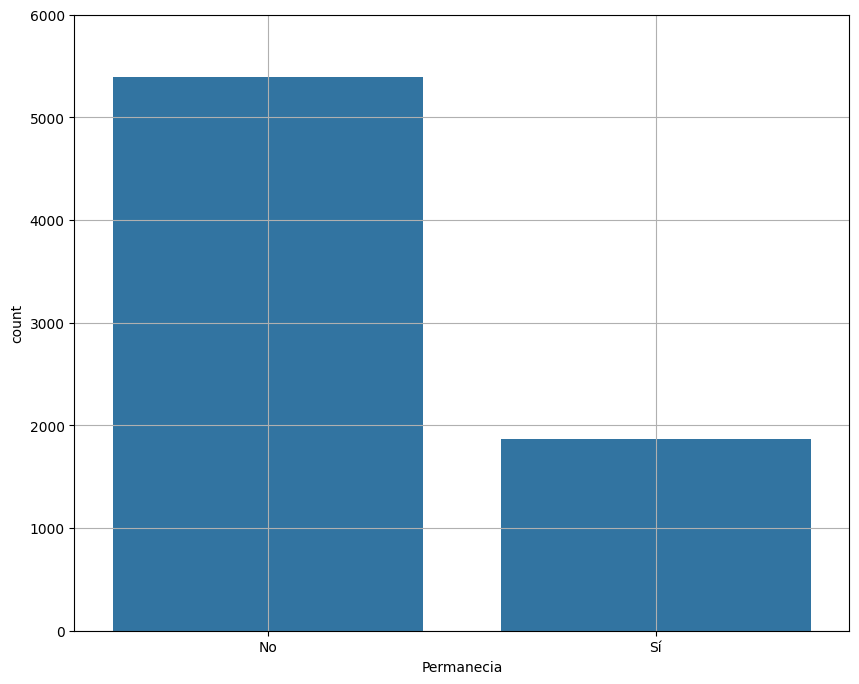

In [255]:
churn, axs = plt.subplots(figsize=(10,8))#creamos un lienzo
#con seanborn ponga una grafica de barra
sns.countplot(x=df['Churn'],data=df) #saque los datos de la variable chrun pal eje x
plt.xticks([0,1],['No','Sí']) #cambie los valores EN LA GRAFICA DE 0 Y 1 A SI Y NO
axs.xaxis.set_label_text('Permanecia') #PONGA UN SUBTITULO
axs.set_ylim(0,6000) #suba la grafica hasta los 6k
plt.grid() #ponga regita
plt.show()

Vemos que la decersion de clientes está por encima de los 5000, puede tener un poqito de sesgo porque habian datos en blancos donde los pasamos al no

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas:

- género
- tipo de contrato
- método de pago

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Toca tomar a los que no se quedaron y decir este porcentaje es hombre y este es mujer, lo mismo con las que toca con los que sí se quedaron

In [256]:
#primero toca añadir genero a la base que habiamos separado por conveniencia
df['gender'] = base['gender']

In [257]:
df.head()

,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly,Cuentas diarias,gender
0,0,9,1,DSL,1,1,0,One year,Mailed check,65.6,2.186667,Female
1,0,9,1,DSL,0,0,1,Month-to-month,Mailed check,59.9,1.996667,Male
2,1,4,1,Fiber optic,0,0,0,Month-to-month,Electronic check,73.9,2.463333,Male
3,1,13,1,Fiber optic,0,1,1,Month-to-month,Electronic check,98.0,3.266667,Male
4,1,3,1,Fiber optic,1,1,0,Month-to-month,Mailed check,83.9,2.796667,Female


In [258]:
mujeres = df['gender']=='Female'

In [259]:
hombres= df['gender'] =='Male'

In [260]:
hombres_que_se_fueron = df[(df['Churn'] == '1') & hombres]

In [261]:
hombres_que_se_quedaron = df[(df['Churn'] == '0') & hombres]
#nombre = mini base donde churn = 0 y gender = male

In [262]:
mujeres_que_se_quedaron = df[(df['Churn'] == '0') & mujeres]

In [263]:
mujeres_que_se_fueron = df[(df['Churn'] == '1') & mujeres]

In [264]:
lista_se_fueron = [len(hombres_que_se_fueron), len(mujeres_que_se_fueron)]

In [265]:
lista_se_quedaron = [len(hombres_que_se_quedaron), len(mujeres_que_se_quedaron)]

In [266]:
generos = ['Hombres','Mujer']

graficamos

##por genero

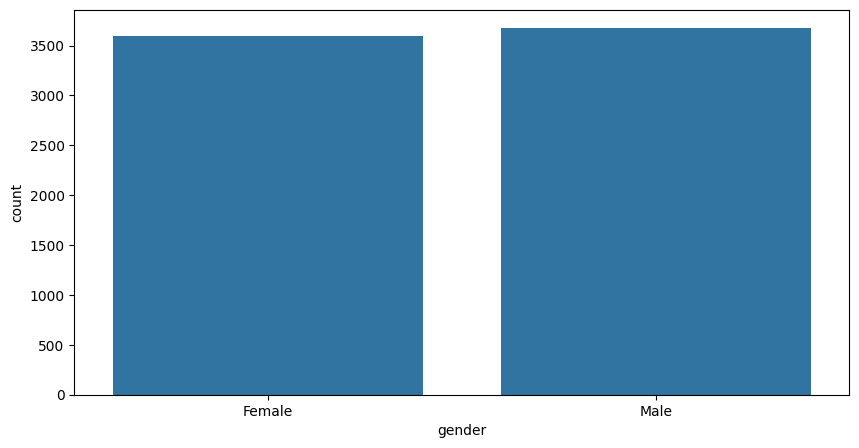

In [267]:
generos, axs = plt.subplots(figsize=(10,5))
sns.countplot(x=df['gender'],data=df)
plt.show()

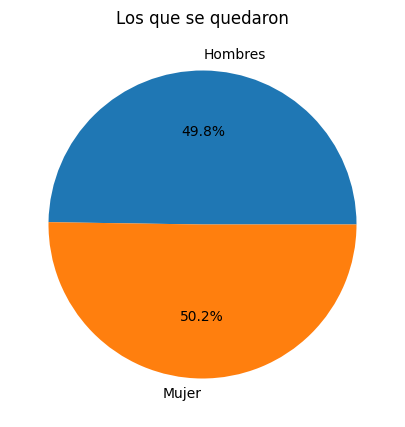

In [268]:
fig, axs = plt.subplots(figsize=(10,5))
plt.pie(lista_se_fueron, labels = ['Hombres','Mujer'],autopct='%1.1f%%')
plt.title('Los que se quedaron')
plt.show()

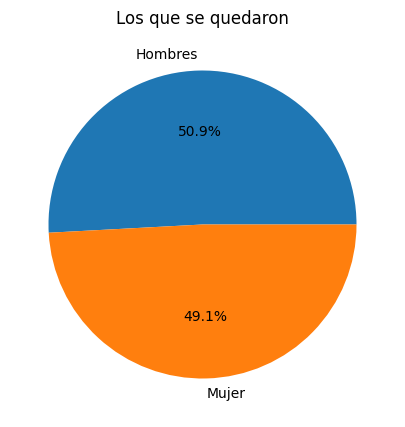

In [269]:
fig, axs = plt.subplots(figsize=(10,5))
plt.pie(lista_se_quedaron, labels = ['Hombres','Mujer'],autopct='%1.1f%%')
plt.title('Los que se quedaron')
plt.show()

##por contrato

para ver la distribucion por medio de los contratos primero toca saber cuantos contratos hay

In [270]:
kindcontract = list(df['Contract'].unique()) #hay 3 tipos de contratos, entonces toca contar cuantas personas hay que se fueron y se quedaron con
print(kindcontract)
#creamos filtros
se_fueron= (df['Churn']=='1')
se_quedaron= (df['Churn']=='0')
un_year = df['Contract']=='One year'
un_mes =df['Contract']=='Month-to-month'
dos_year =df['Contract']=='Two year'

se_fueron_un_año = df[ se_fueron & un_year]
se_quedaron_un_año =df[se_quedaron & un_year]
se_fueron_mes = df[se_fueron & un_mes]
se_quedaron_mes = df[se_quedaron & un_mes]
se_fueron_dos_años = df[se_fueron & dos_year]
se_quedaron_dos_años=df[se_quedaron & dos_year]

año = [se_fueron_un_año.shape[0], se_quedaron_un_año.shape[0]]
      #dime la cantidad de personas que se fueron en un año, dime la cantidad de personas que se quedaron en un año
mes = [se_fueron_mes.shape[0],se_quedaron_mes.shape[0]]
años = [se_fueron_dos_años.shape[0], se_quedaron_dos_años.shape[0]]


['One year', 'Month-to-month', 'Two year']


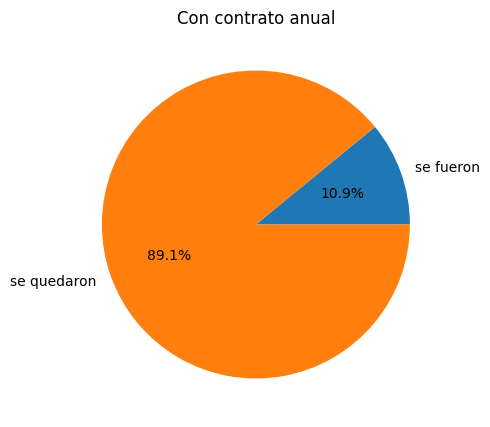

In [271]:
#graficamos

g_un_año, axs = plt.subplots(figsize=(10,5))
plt.pie(año, labels= ['se fueron','se quedaron'],autopct='%1.1f%%')
plt.title('Con contrato anual')
plt.show()

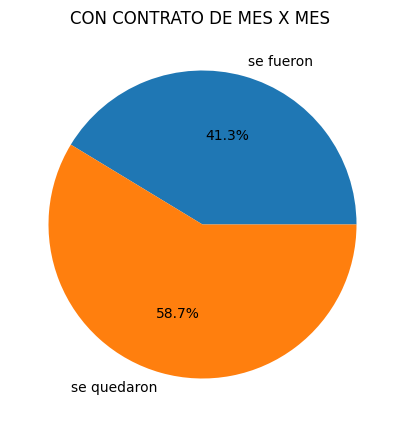

In [272]:

g_un_año, axs = plt.subplots(figsize=(10,5))
plt.pie(mes, labels= ['se fueron','se quedaron'],autopct='%1.1f%%')
plt.title('CON CONTRATO DE MES X MES ')
plt.show()

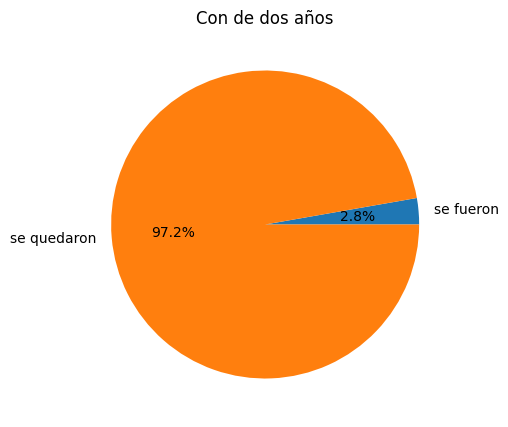

In [273]:
g_un_año, axs = plt.subplots(figsize=(10,5))
plt.pie(años, labels= ['se fueron','se quedaron'],autopct='%1.1f%%')
plt.title('Con de dos años')
plt.show()

##por método de pago

In [274]:
#creamos los filtros
#como hay filtros de que se van o no entonces esos no se crean
#ahora toca saber cuales son los tipos de contratos para crearles filtros combinados
df.columns

metodos_de_pago = list(df['PaymentMethod'].unique())
print(metodos_de_pago)

['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


In [275]:
#creamos filtros combinados
f_factura = df[se_fueron & (df['PaymentMethod'] == metodos_de_pago[1])]
q_factura= df[se_quedaron & (df['PaymentMethod'] == metodos_de_pago[1])]

f_correo = df[se_fueron & (df['PaymentMethod'] == metodos_de_pago[0])]
q_correo= df[se_quedaron & (df['PaymentMethod'] == metodos_de_pago[0])]

f_tarjeta = df[se_fueron & (df['PaymentMethod'] == metodos_de_pago[2])]
q_tarjeta= df[se_quedaron & (df['PaymentMethod'] == metodos_de_pago[2])]


f_transferencia = df[se_fueron & (df['PaymentMethod'] == metodos_de_pago[3])]
q_transferencia= df[se_quedaron & (df['PaymentMethod'] == metodos_de_pago[3])]
#toca así porque no deja juntar filtros booleanos(se fue o no se fue) con variables categoricas

hacemos las listas porque las graficas solo sirve por listass

In [276]:
factura=[f_factura.shape[0],q_factura.shape[0]]
correo=[f_correo.shape[0],q_correo.shape[0]]
tarjeta = [f_tarjeta.shape[0],q_tarjeta.shape[0]]
transferencia = [f_transferencia.shape[0],q_transferencia.shape[0]]

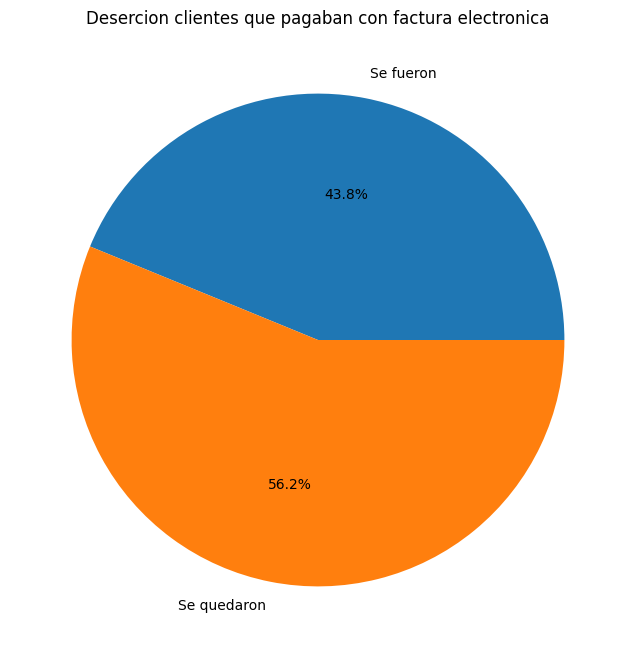

In [277]:
gra_f, axs = plt.subplots(figsize=(16,8))
plt.title('Desercion clientes que pagaban con factura electronica')
plt.pie(factura,labels=['Se fueron','Se quedaron'],autopct='%1.1f%%')
plt.show()

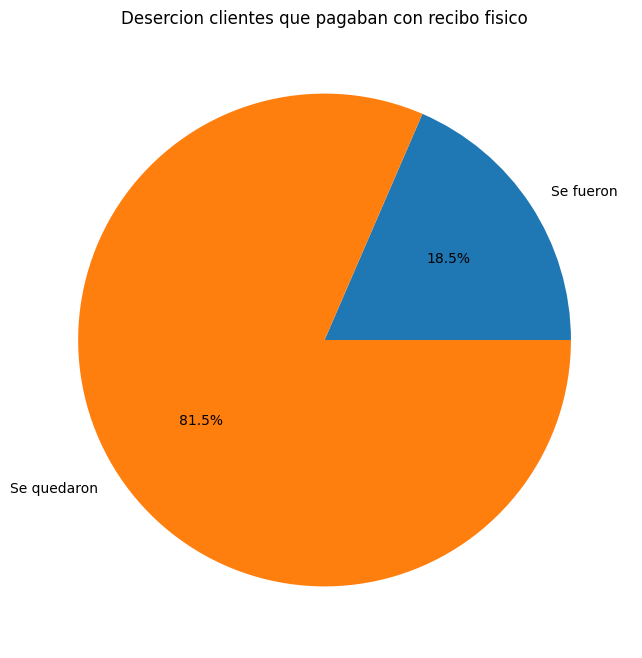

In [278]:
gra_f, axs = plt.subplots(figsize=(16,8))
plt.title('Desercion clientes que pagaban con recibo fisico')
plt.pie(correo,labels=['Se fueron','Se quedaron'],autopct='%1.1f%%')
plt.show()

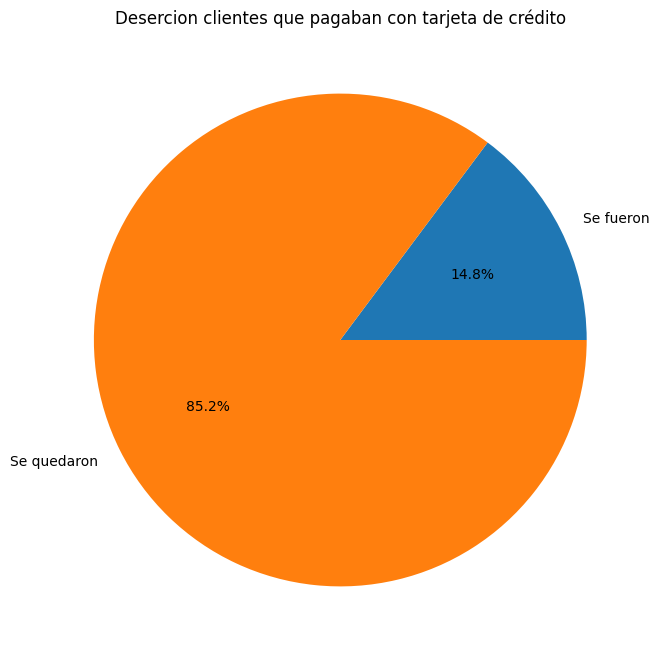

In [279]:
gra_f, axs = plt.subplots(figsize=(16,8))
plt.title('Desercion clientes que pagaban con tarjeta de crédito')
plt.pie(tarjeta,labels=['Se fueron','Se quedaron'],autopct='%1.1f%%')
plt.show()

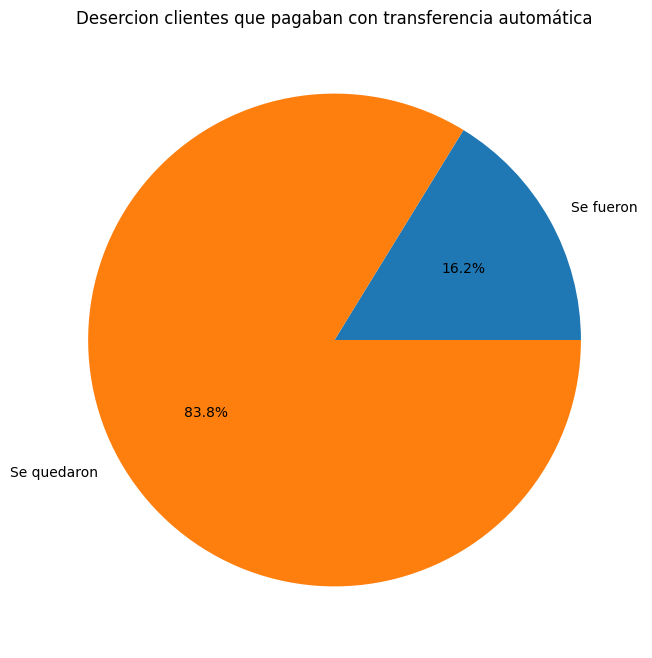

In [280]:
gra_f, axs = plt.subplots(figsize=(16,8))
plt.title('Desercion clientes que pagaban con transferencia automática')
plt.pie(transferencia,labels=['Se fueron','Se quedaron'],autopct='%1.1f%%')
plt.show()

##Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.


In [281]:
base.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

In [282]:
list(df.columns) #tomamos monthly y toca agregar el total la ptm

['Churn',
 'tenure',
 'PhoneService',
 'InternetService',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'Monthly',
 'Cuentas diarias',
 'gender']

toca agregar la variable porque en la mini base que separé no la incluí, entonces toca hacerle todo el preprocesamiento de datos para la variable

###preprocesamiento de la vairable total

In [283]:
df['Total gastado']=base['Total']

In [284]:
list(df.columns)

['Churn',
 'tenure',
 'PhoneService',
 'InternetService',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'Monthly',
 'Cuentas diarias',
 'gender',
 'Total gastado']

In [296]:
df.dtypes #verificamos el tipo de variable para total gastado

,0
Churn,object
tenure,int64
PhoneService,object
InternetService,object
TechSupport,object
StreamingTV,object
StreamingMovies,object
Contract,object
PaymentMethod,object
Monthly,float64


In [286]:
#verificamos si tiene valores faltantes o nulos
((df['Total gastado']==' ') ).sum()

np.int64(11)

In [287]:
#las reemplazamos con NA
import numpy as np

df['Total gastado'] = df['Total gastado'].replace(' ',np.nan)

In [288]:
df['Total gastado'] = df['Total gastado'].dropna()

In [298]:
df['Total gastado']= df['Total gastado'].astype('float64')

In [299]:
df.dtypes

,0
Churn,object
tenure,int64
PhoneService,object
InternetService,object
TechSupport,object
StreamingTV,object
StreamingMovies,object
Contract,object
PaymentMethod,object
Monthly,float64


NO SE PUDO HACER LO QUE QUISE LA PTM

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀


### **Introducción**

El objetivo principal de este análisis fue comprender los factores que influyen en la evasión de clientes (churn) en la empresa TelecomX LATAM. La pérdida de clientes representa un desafío crítico para las empresas de telecomunicaciones, ya que afecta directamente la rentabilidad y sostenibilidad a largo plazo. Identificar los patrones detrás de la cancelación de servicios permite diseñar estrategias más efectivas de retención y personalización.

---

### **Limpieza y Tratamiento de Datos**

El análisis comenzó con la extracción de datos desde una API, donde la información se encontraba anidada. Fue necesario:

* Desanidar columnas (customer, phone, internet, account) para obtener una base plana.
* Verificar y corregir tipos de datos incorrectos.
* Tratar valores faltantes y vacíos, especialmente en variables clave como Churn y Total gastado.
* Crear nuevas variables como "Cuentas diarias", dividiendo el valor mensual entre 30 para obtener una visión más granular.
* Transformar variables categóricas (por ejemplo, "Yes"/"No") a valores binarios (1 y 0) para facilitar análisis posteriores.

---

### **Análisis Exploratorio de Datos**

Se realizaron diversas exploraciones y visualizaciones:

#### Proporción general de churn

Se observó que una gran proporción de clientes cancelaron el servicio, lo cual sugiere una oportunidad para trabajar estrategias de fidelización.

#### Distribución por género

Los gráficos mostraron que tanto hombres como mujeres presentan tasas de churn similares, aunque ligeramente mayores en algunos casos para las mujeres.

#### Distribución por tipo de contrato

Se identificó que los clientes con contrato mensual son más propensos a cancelar, mientras que los contratos anuales y bianuales presentan tasas de retención significativamente mejores. Esto refleja el impacto de la duración contractual en la permanencia.

#### Distribución por método de pago

Los clientes que pagaban mediante factura electrónica y transferencia automática mostraron tasas de retención mayores, en comparación con los que usaban factura física o tarjeta de crédito.

#### Variables numéricas

Al analizar Total gastado y Monthly charges, se evidenció que clientes con pagos mensuales elevados y menor gasto acumulado son más propensos a abandonar, probablemente por percepciones de costo excesivo o insatisfacción temprana.

---

### **Conclusiones e Insights**

* Contratos más cortos están asociados a mayor churn. Incentivar contratos largos puede reducir cancelaciones.
* El método de pago tiene un papel importante. La automatización y los medios electrónicos están asociados a menor churn.
* Los clientes con menor gasto total, pero pagos mensuales altos, parecen insatisfechos o sensibles al precio.
* Variables como soporte técnico, seguridad en línea y servicios de streaming pueden influir indirectamente en la retención.

---

### **Recomendaciones**

* Fomentar contratos anuales o bianuales con descuentos atractivos o beneficios adicionales, como servicios premium gratuitos por un tiempo.
* Incentivar el pago automático mediante promociones o programas de puntos para quienes utilicen transferencia o débito automático.
* Segmentar a clientes de alto riesgo (por ejemplo, con contratos mensuales y pagos altos) para enviar ofertas personalizadas o programas de fidelización.
* Mejorar la percepción de valor, especialmente para clientes con pagos mensuales altos, explicando mejor los beneficios y optimizando la atención al cliente.
* Monitorear continuamente las métricas de churn por género, contrato y método de pago para adaptar estrategias en tiempo real.

